# Introduction

An overwhelming amount of research suggests that having a college degree can lead to higher salaries as well as higher job security[1][2]. However, with many colleges and universities to select from, it raises the question whether or not getting a college degree from one university over another yields higher and more prosperous job opportunities. A recent trend is showing that the selectivity of prestigious schools are increasing due to the increasing number of applicants applying to these schools each year[3]. Amidst a strong interest among students for prestigious universities, it challenges the notion that all colleges are equal. Our research project looks at colleges across America and attempts to predict which set of college attributes best predicts the highest post-undergraduate salary specifically for computer science majors. Thus, our research question is "Which combination of factors best predicts the salary of computer science undergrads, and what aspects of these factors (ex. higher vs lower factor values) maximizes the predicted salary?" 

The college attributes, or factors, that we have chosen to examine are ones commonly referenced by news sources and websites as metrics for college performance. They are as follows: college prestige ranking, teacher-student ratio, student undergraduate population, post-graduation salary for computer scientists, average professor ratings, and salary by area. We define "salary by area" to be the salaries of computer-science jobs in the same geographical region of the college of interest, or more technically, the same (non)metropolitan area as the college of interest. A metropolitan area, as defined by the Bureau of Labor Statistics (BLS), is an urban center and its rural surroundings, whereas a nonmetropolitan area does not have an urban center. Nonmetropolitan and metropolitan areas are described by the counties within it. 

Data for each factor was gleaned from a variety of sources. College prestige rankings came from `topuniversities.com`, a website created by QS Quacquarelli Symonds and in partnership with Elsevier. Post-graduation salary for computer scientists also came from a website, namely `payscale.com` by Payscale Inc. From the National Center for Education Statistics (NCES), we retrieved data fro teacher-student ratio, student undergraduate population, and school county. Salary by area data came from the Bureau of Labor Statistics. Lastly, `ratemyprofessor.com`, created by Rate My Professors and owned by Altice USA News, provided average professor ratings per school. 

BRIEF SUMMARY OF FINDINGS
WHY SETTING IS IMPORTANT 
WHY RESULTS OF ANALYSIS MATTER

[1] https://www.aplu.org/projects-and-initiatives/college-costs-tuition-and-financial-aid/publicuvalues/employment-earnings.html#:~:text=The%20evidence%20that%20a%20college,on%20average%20over%20their%20lifetime.
<br>
[2] https://www.insidehighered.com/news/2016/08/22/study-finds-graduates-most-selective-colleges-enjoy-earnings-payoff#:~:text=The%20results%20show%20that%2C%20after,and%2019%20percent%20more%20than
<br>
[3] https://www.theatlantic.com/education/archive/2016/03/where-admissions-went-wrong/475575/ 

# Data Collection/Cleaning Summary

Please see the Appendix for where to find the data collection/cleaning code.

#### Overall Data Cleaning Goal
We want one big dataframe, hereby called `main dataframe`, that has one entry per college. The final dataframe will have these columns: school name, ranking, tsr (stands for teacher-student ratio), pop (for student undergrad population), early_pay (salary post-graduation), a_mean (average salary for computer scientists in the area of the college), a_median (median salary by area), rat (average professor rating), and county (for location).

#### Data Collection and Sources for each factor 
Please see the Appendix for citations/links to these sources. Below is a more in-depth description of what we did to retrieve data from the sources described in the Introduction, listed by the factor of interest.

- School names and prestige rankings
> From source `topuniversities.com`, we "webscraped" a list of the top computer science schools in 2020 (ranked from highest to lowest prestige). The webscraping was unconventional in that we copied the entire webpage into a txt file, and then parsed the txt for ranks and school names. This site was chosen because unlike other ranking lists such as `USNews`, this site factored in employer opinion/surveys on school prestige into their ranking list, which is important to us because we are analyzing relationships with job salary. For a list of all ranking lists we considered, please see the Appendix. 
- Post-undergrad salary (called early_pay in our main dataframe) 
> From `payscale.com`, we webscraped early-career computer science salaries by school. This dataset does not name individual contributors. 
- Teacher-student ratio 
> The NCES collects data on teacher-student ratio for all US institutions. We downloaded their teacher-student ratio dataset of 6000+ schools for cleaning and processing. This dataset was created by NCES and does not list the individual contributors.  
- Student undergrad population
> NCES has a dataset for enrollment (graduate and undergraduate) per school available for download. This dataset was created by NCES and does not list the individual contributors.  
- County
> NCES has a dataset for geographic characteristics per school (i.e. state, city, county, zip code, etc.) that we downloaded. This dataset was created by NCES and does not list the individual contributors.
- Average/median salary for computer scientists in the area where the college is located 
> The BLS has a downloadable dataset for each occupation's salary in all metropolitan and nonmetropolitan areas. The BLS includes a separate dataset that shows which counties are within which metropolitan area. Thus it is important that we find the county that each school is in, since we can map counties to (non)metropolitan areas, and then (non)metropolitan area to the computer science salary of that region. This dataset was created by the Bureau of Labor Statistics and does not list the individual contributors.
- Average professor rating 
> We attempted to webscrape average professor ratings from `ratemyprofessor.com`, but due to technical difficulties, we manually collected data from the site. The technical difficulties were that `ratemyprofessor.com` requires a lot of clicking and typing into search bars to navigate, and while we could have used the Python package Selenium to automate this or manipulated URLs, it would be overly complex for the given time frame. 

#### Data Cleaning Steps
1. **Cleaning School Names**: We used the dataframe of school names and rankings (created from webscraping `topuniversities.com`) as the basis of our `main` dataframe. Because we needed to use the school names in `main` to lookup information about the same school in other datasets, we first cleaned the school names by removing extra spaces, punctuation, and abbreviations, as different datasets punctuate their school names differently. 

2. **Importing Post-Undergrad Salary**: Since the school names in our dataset of post-undergrad salaries differed from what we used in `main` (ex. `Columbia University` was listed as `Columbia University in New York City`), we used the following algorithm to match school names: if a school name in the lookup dataset contained all of the components of the school name in our `main` dataset in the same order, then that was a match (so since `Columbia University in New York City` contains `Columbia` and `University` in the same order as `Columbia University`, there is a match). In this way, we could import salary data from one dataset into our main. 
> If any school wasn't found in the salary dataset, we checked to see that the algorithm wasn't failing. If the school really wasn't on `payscale.com`, we threw out the school from analysis because if we were to manually Google and input these salaries, this would generate inconsistency with our existing salary data as different online sources use different data collection and analysis methods to calculate post-graduation salaries. 

3. **Importing UnitID**: We used a similar algorithm as to above to lookup and import the UnitID for each school from a NCES dataset of schools and their unitIDs. The unitID is a unique number assigned to each college by the NCES, and is the number the NCES uses to index their other datasets. We use the unitID to lookup data from any NCES datasets in the following steps. There were cases in which our algorithm failed (ex. the NCES may list a college by campus names, if the college has many campuses), in which case we manually inserted the unitID. 

4. **Importing Student-Faculty Ratio, County, and Enrollment**: We use the unitID for each school to lookup its enrollment, county, and student-faculty ratio from three different NCES CSV files and import that into the main dataframe.

5. **Finding average/median computer scientist salary by (non)metropolitan area**: We take the BLS dataset of all occupations' salaries per (non)metropolitan area and filter out all non-computer science related jobs. We defined computer-science related job as a job that someone with a bachelor's in computer science could have and that would allow them to apply computer science knowledge (ex. Computer Systems Analysts). We then filtered out salaries listed as `*` (not found), grouped by (non)metropolitan area and calculated the mean and median salary per area. 

6. **Placing colleges in their respective (non)metropolitan area**: We match up schools with the non(metropolitan) area that it is in by county. Essentially, we use the BLS dataset mapping (non)metropolitan area to county, and lookup each school's county to get the (non)metropolitan area that the school is in.

7. **Matching colleges with the average/median salary in its non(metropolitan) area**: Using the (non)metropolitan area that each college is in, gathered in step 6, we were able to match the metropolitan area with the average/median salary of the area from the cleaned dataset in step 5 and import that salary into our `main` dataframe.

8. **Importing Average Professor Rating**: We used a similar algorithm from step 2 to lookup a school's average professor rating from our manually collected dataset from `ratemyprofessor.com` and import it into our `main` dataframe.

9. **Converting Prestige Rankings to Ranks 1-4**: We don't care about the exact ranking of a college. After all, every ranking list uses slightly different algorithms, yet there is a general consensus on what schools are more prestigious than others (ex. it is generally agreed that MIT is more 'prestigious' than University of Missouri). We of course chose `topuniversities.com` as our main ranking list because we felt its algorithm (which includes employer surveys) was especially relevant to our project, but we still care more about whether a college is generally high-ranking, low-ranking, etc. than whether a specific school is exactly 1st place or 3rd place. Thus, we used the numeric rankings scraped from `topuniversities.com` to place schools into a ranking between 1-4, like so: 

>- Rank 1 (very good) 
>> The college is in the top 20 internationally for computer science. The exact ranking of the college is not super important, we just care that it is very highly-ranked.
>- Rank 2 (great)
>> The college is ranked between 21-100. 
>- Rank 3 (ok) 
>> The college is ranked between 101-300 
>- Rank 4 (at this point, nobody really cares about the ranking)
>> The college is ranked between 301-600 (the lowest ranking `topuniversities.com` has).  

While there wouldn't be the same number of schools per rank 'bin' (i.e. less schools with 1 ranking), this ranking system clarifies the boundaries between school prestige ranking better and more accurately represents which schools have the top prestige level than if we put the same number of schools per rank. In contrast, if we had the same number of schools per rank, super prestigious schools may be lumped with somewhat prestigious schools, which is not ideal. Another advantage of this ranking system is that for future analysis, we can more easily analyze the data since we only have 4 ranks to compare factors with, as opposed to 600 ranks.

10. **Miscellaneous Typecasting Columns**: We typecasted any columns that weren't the correct datatype (ex. salaries webscraped from `Payscale` were strings instead of floats, and contained unwanted commas). We also did a final cleaning of school names (ex. removing extra spaces) for consistency. 

---
#### Final Dataframe

In [1]:
import pandas as pd
main = pd.read_csv("main.csv")

# Delete extra index column, introduced by pandas during conversion to CSV 
del main["Unnamed: 0"]
main.head()

,school,rank,tsr,pop,early_pay,a_mean,a_median,county,rat
0,Massachusetts Institute of Technology,1,3.0,4602,99800,100149.41,96790.0,Middlesex County,3.94
1,Harvard University,1,7.0,9950,96100,100149.41,96790.0,Middlesex County,3.95
2,Tufts University,4,9.0,5643,88000,100149.41,96790.0,Middlesex County,3.81
3,Stanford University,1,5.0,7087,107400,122369.38,124350.0,Santa Clara County,3.97
4,Carnegie Mellon University,1,10.0,6589,99000,86185.62,83340.0,Allegheny County,3.77


---
# Data Description

**What are the observations(rows) and the attributes(columns)?**

The observations are colleges (though the row indices are indices starting from 0). The attributes are: 
- `school`
- `rank` (a ranking between 1-4, with 1 being the most prestigious)
- `tsr` (teacher-student ratio, in the format #, where # is # of students per teacher)
- `pop` (student undergrad enrollment)
- `early_pay` (early career pay, as in within 5 years of graduating, for computer science majors)
- `a_mean` (the mean salary for computer scientists in the college's location region)
- `a_median` (same as `a_mean`, but for medians)
- `county` (school's county, for reference purposes rather than actual data analysis)
- `rat` (average professor rating). 

**Why was this dataset created?**

With the number of college applicants increasing, more and more choices for colleges, and tons of ranking lists and information online, students may struggle to determine what factors to consider when choosing to apply to college in a way that will maximize their post-undergrad salary. This dataset provides data for us to research what combination of factors maximizes early career salaries for computer science majors, and was built from a collection of other datasets, each of which was created for various reasons. 

We used datasets from the Bureau of Labor Statistics, which were created for the purpose of giving the government an accurate picture of the various occupations per major regions in the US and the earnings of laborers, so that the government can make more informed labor-related decisions. We also manually collected data from `ratemyprofessors.com`, a site that hosts professor reviews in order to give students a central location to share honest opinions about their teachers without the scrutiny of institutions. 

The majority of our datasets about college characteristics comes from The National Center for Education Statistics, which  creates educational statistics datasets to help the government make informed education-related decisions and for international comparison between the state of U.S. education and that of other nations. Both of the datasets we web-scraped were created by companies that wanted to provide information to the public to help students and employees make informed choices about their future: for example, the computer science salary by school dataset that we web-scraped from `payscale.com` is meant to help employees better estimate their worth in the job market, by comparing their current salary to the average of the school they went to, while the `topuniversities.com` ranking list by company QS Quacquarelli Symonds is for high school seniors hunting for colleges.

**Who funded the creation of this dataset?**

The funding history of our final dataset ties back to the funding of the entities whose data we used. Both the Bureau of Labor Statistics and the National Center for Education Statistics are federal agencies operating off government funding to generate their datasets.

However, for data collected from websites, it is less clear where the funding is coming from. The website hosting computer science salary data, `payscale.com`, is owned by Payscale, a company that generates revenue by creating software that clients may use through a license, but people don't have to pay to use their salary data, nor is anyone paid to fill out surveys about their salaries. Meanwhile,`ratemyprofessors.com` is a website owned by Altice USA News; though this company funds the upkeep of the rating site, the data itself isn't created via funding, as students aren't paid to leave reviews and only do so voluntarily. 

`topuniversities.com` has the most interesting funding background. QS Quacquarelli Symonds owns the website and funds the QS Intelligence Unit, which gathers the ranking data. There are claims on <a href=https://en.wikipedia.org/wiki/QS_World_University_Rankings#cite_note-QC2012-24>Wikipedia</a> that the company purchased mailing lists or bought survey responses, but the sources cited in the article are unclear about this. Not surprisingly, the company has not admitted to doing any of these things, so it is uncertain what the truth is. It may not be so important if surveys were bought, since from a data science perspective, the use of surveys itself may be more of an issue.

**What processes might have influenced what data was observed and recorded and what was not?**

Collecting salary data from every major region in the U.S. is not an easy task, especially in rural areas. It is pointed out [1] that the Bureau of Labor Statistics has less data points from (non)metropolitan areas, since the process of finding and communicating with relevant employers in a rural, spread-out region is more difficult than in a centralized city location. Further, the Bureau uses the <a href=https://www.bls.gov/bls/blswage.htm#Metropolitan>process of sending out surveys to employers to gather salary information</a>, and responses to the surveys are only <a href=https://www.bls.gov/respondents/oes/faqs.htm#5>mandatory in some states</a>. Data observations then directly relate to who actually responds. Only a statistically significant sample of US businesses are selected for surveying in the first place, so a random process influences what data points are even attempted to be recorded. 

For `ratemyprofessors.com`, the process of signing up to leave a review does not include a background check to ensure that students leaving reviews are actual students of the professor in a specific university, leading to the possibility of inaccurate data points being recorded. A psychological process also comes into play: how strong the user feels about their experience with a professor will affect their desire to rank them, which means students with more passionate feelings may leave more extreme reviews, while students who had good experiences may not even feel the need to write a review at all. 

According to <a href=https://www.payscale.com/college-salary-report/methodology>Payscale's methodology</a>, salary data by school is collected via a voluntary online survey. If graduates want to know their price in the labor market, they have to provide their current salary, characteristics, etc. in return for a report from the Payscale website, so there is an incentive for graduates to fill out the survey. On the flip side, psychological processes may result in people who are more insecure about their salary (especially if it is very low) being more likely to respond to the survey. Payscale evidently rigorously checks the accuracy of the information provided, such that fake data points are not recorded. Similar to Payscale, the NCES uses surveys to gather information regarding educational factors for their respective studies. This data method could influence what data was observed and recorded because the completeness and reliability of the data is reliant upon the accuracy and truthfulness of the surveys as well as how many people participated in the survey. 

Lastly, according to the <a href=https://www.topuniversities.com/subject-rankings/methodology>methodology</a> for TopUniversities, the website gathers citation information to help rank computer science programs. This citation information comes from Scopus, a database of 69 million peer-reviewed titles, but it is feasible that research papers from schools may not make it onto this site. Since only 5-year’s worth of data from Scopus is analyzed, this process means that schools that peaked in research citations prior to that time period may be ranked differently than if that past data were included. Additionally, TopUniversities sends surveys to academics and employers to gather ranking opinions, so as with surveys used for NCES and Payscale, the accuracy of the responses and who responds may vary (if the person even responds). Notably, if someone does choose to respond, they are not allowed to rank their own school. 

All of the processes above then directly affect our dataset, because we used the raw data from these entities without discarding any of their data points except those related to schools not on our ranking list (and as aforementioned, we did not consider schools without salary data on `Payscale.com`). 

[1] https://www.ncbi.nlm.nih.gov/books/NBK190072/#:~:text=CONCLUSION,data%20are%20not%20as%20reliable

**What preprocessing was done, and how did the data come to be in the form that you are using?**

Please see the Data Cleaning section above for details on the processing of the final dataset. All of the sites and entities discussed above ran their data through their own statistical analysis before making the datasets public and available for use in our own dataset. For example, Payscale filtered out inaccurate salary reports from respondents before calculating average salary by school. Meanwhile, TopUniversities standardized their survey results, while also calculating the H-index, a measure of how productive a researcher is related to the number of their publications and how often they are cited as a source, to include in their rankings calculations. Notably, `ratemyprofessors.com` does not appear to do any major processing of the reviews left on the site, though site maintainers do check reviews for constructiveness and reviews can be reported for not following the site’s etiquette guidelines. 

**If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?**

Most of the datasets we used to build our `main` dataframe involved surveying of some kind. The survey respondents were aware that the information that they were filling out would go towards a general dataset of information that would be presented to the public. They expected that the information that they gave on their surveys would be used accurately and truthfully to reflect their experiences, and responding was largely voluntary (expect for employers in states where the Bureau of Labor Statistics required a response, but even then, respondents were well-informed of the purpose of the survey). 

**Where can your raw source data be found, if applicable?** 

The datasets can be found in Github at https://github.com/tangteresa/INFO2950-Project or in the zip file for this notebook.

# Data Limitations

The Bureau of Labor Statistics dataset may have several limitations. The first is that because self-employed workers were not surveyed, the data might not be representative of those computer scientists who are self employed, such as freelance computer programmers. The exclusion of these data points can lead to a skewed salary result. However, we believe this may not have a significant impact, as most recent college graduates are not self-employed, though if any were, they would not be represented in our results since we focus on salary reports from those who are employed by a company. Further, the Bureau used employer surveys for salary estimates. Surveys can be unreliable because they rely on self reporting, which could be inaccurate if the individual taking the survey misrepresented his/her’s information. Also, it could be possible that different amounts of surveys were taken into account for different metropolitan areas. Therefore, those with lower amounts of survey data might have a lot of variability, skewing the data. This is certainly the case for nonmetropolitan areas, which are harder to collect data from, but this is not likely going to affect our results much, since most of our schools are in metropolitan areas with many employers/data points. 

Meanwhile, the data from `ratemyprofessors.com` can be skewed by biased reportings from students. As a result, the ratings for a specific university might not be representative of the true faculty quality. This would mean that our basis of professor ratings does not accurately reflect school teaching quality due to bias, as it is likely that students who have more negative views are more likely to leave a review, dragging down professor ratings. `ratemyprofessors.com` asks for professor difficulty ratings from students who leave a review; students may leave high reviews for professors who are easy, whereas professors that have difficult classes (but good teaching) may get lower ranked. Thus, we should be careful to avoid claiming that average professor ratings directly measures teaching quality when reporting our results about whether professor ratings is important for maximizing graduate salary. 

Similar to the limitations for `ratemyprofessors.com`, all the data sources that used surveys in their data collection will likely suffer from some form of bias, not only in the truthfulness of the surveyed, but also voluntary response bias, as some category of people may be more likely to respond than others. The Bureau of Labor Statistics somewhat mitigates this by having surveys be mandatory for some states. The meaning of our results should then be interpreted as a recommendation, not a fact, because most of our data stems from subjective sources. This is especially important for students who may use our results, because they should understand that even if our results reveal that certain factors maximize post-undergrad salary, it may not work for them due to the variability and subjectivity of the factors. 

Even datasets that appear to use objective measures may have limitations. For example, TopUniversities uses the H-index as a factor in calculating college prestige rankings. The index uses a researcher's set of most-cited papers and how many other people have cited this researcher to measure "researcher productivity." Schools with productive researcher have higher academic quality, in theory. However, the limitation is that the H-index may not measure productivity, but more so measures popularity and how much exposure or publicity a researcher can get for their paper. The effect on our results meaning is that prestige is closely related to popularity, so if it turns out to be a major factor in maximizing post-undergrad salary, it will be difficult to say exactly how someone can differentiate between a school that is prestigious vs. popular. However, we did attempt to mitigate the effect of inaccuracies with survey results and measuring researcher "productivity" on our results by re-ranking colleges to be between 1-4, to account for unimportant variations in exact ranking.

There is a sort of feedback loop with surveying employers and getting prestige rankings. If graduates from a certain school have a certain salary level, then employers who research their market values are more likely to adjust their salary offers to be similar. This perpetuates the salary level for those graduates, such that salary levels may be more related to the status quo than reflect changes in student or school quality. There is a similar feedback loop with professors with high rankings, in that professors with high rankings are more likely to attract more students, who will likely perpetuate the quality of the professor, whereas professors who are great teachers but don’t get initial exposure may continue to remain less well-known and have steady ratings. In this way, the data we have collected may be a measurement of status quo and may not capture fluctuations in school quality, so the meaning of our results should be interpreted as a snapshot in time. A longitudinal study may more accurately reflect how graduate salary actually changes and correlates with factors. 

Lastly, we removed colleges that were ranked highly but that didn't have salary data on `payscale.com`. While we only removed a couple and still have a large sample to work with, these removed top schools garner a lot of public/applicant interest, so our results may appear less valuable to students since we don't consider certain popular schools. 

# Exploratory Data Analysis

We want to see the general shape of each our factors and get a sense of how closely grouped the data is, so a histogram is important. Seeing how closely grouped the data is especially necessary because for example, if computer science post-undergrad salaries are super close together and there is little variation, this may tell us that analyzing what school has the highest post-undergrad salary is not important, as they are all practically the same regardless. We also compare histogram shapes with other to get an estimate of relationships between factors (as opposed to correlations and scatterplots, which would be better suited for proving relationships), and compute both mean and median for most datasets so we can get a numerical sense of how skewed the data is, in addition to a qualitative estimate from a histogram.

In [2]:
import matplotlib.pyplot as plt

---
#### Post-Undergrad Salary 

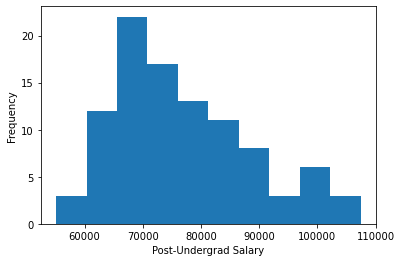

In [3]:
plt.hist(main["early_pay"])
plt.xlabel("Post-Undergrad Salary")
plt.ylabel("Frequency")
plt.show()

In [4]:
pay_sum_stats = main["early_pay"].describe()
print(f"Median: {main['early_pay'].median()}")
print(f"Std dev: {round(pay_sum_stats['std'], 2)}")
print(f"Min: {round(pay_sum_stats['min'], 2)}")
print(f"Max: {round(pay_sum_stats['max'], 2)}")

Median: 73850.0
Std dev: 11778.18
Min: 55100.0
Max: 107400.0


While we originally thought computer science salaries were likely to be super high (90k+) and closely grouped (as in, all with a few thousand dollars of each other), we see that even though computer science is hyped as a high-paying field, there is still lots of wiggle room and a very real possibility of earning less than 90,000 a year. In fact, most of the salaries are 70k to 80k ish (based on the histogram), with a median of `73850`. This is much lower than we expected. 

We see that the standard deviation of `11778.18` is fairly large, and there is a big range of roughly $50,000 between a min of `55100` and a max of `107400`. This confirms the importance of our research; for a fresh college graduate who likely has lots of student debt, getting a job paying 100,000+ dollars versus a job of 50,000 dollars ish can make a huge difference in their quality of life and financial situation. Since there is such a huge range in which a graduate's salary may fall, it would greatly benefit these students to know what college characteristics they should look out for to maximize their likelihood of getting a job with a salary on the higher end of this histogram. 

**Note**: We do not take the mean because these salary points are already averages of computer scientists from a given school, so taking the average of an average doesn't make much sense. Plus, the histogram shows that the data is skewed to one side, so a median is more representative of the data 'center' anyway. 

---
#### Mean Area Salary

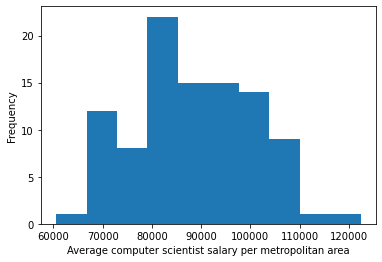

In [5]:
plt.hist(main["a_mean"])
plt.xlabel("Average computer scientist salary per metropolitan area")
plt.ylabel("Frequency")
plt.show()

In [6]:
area_sum_stats = main["a_mean"].describe()
print(f"Median: {main['a_mean'].median()}")
print(f"Std dev: {round(area_sum_stats['std'], 2)}")
print(f"Min: {round(area_sum_stats['min'], 2)}")
print(f"Max: {round(area_sum_stats['max'], 2)}")

Median: 87052.645
Std dev: 11701.77
Min: 60551.67
Max: 122369.38


It is interesting to compare this histogram and stats to the characteristics of post-undergrad salary. While the standard deviations for these two factors are practically the same (`11670` versus `11778`, the mean area salary data sits 'higher' than post-undergrad salary, as its median and max are higher than that of post-undergrad salary by 10k. While we have not yet matched up post-undergrad and area salary for each school, this trend may be evidence (though we will have to do further statsitical analysis to check this) that graduates aren't necessarily getting jobs in the same area as the college they went to. 

On the other hand, the mean area salaries may be higher than what we predict because we took the average of computer science job salaries in a given metropolitan area. Certain areas with one or two higher paying jobs may have means pulled by up these outliers, so it may be more accurate to analyze the median area salary instead regardless of how it relates to post-undergrad salary. At this point, we updated our dataset to also include median salaries by area and compare the results as follows.

#### Median Area Salary

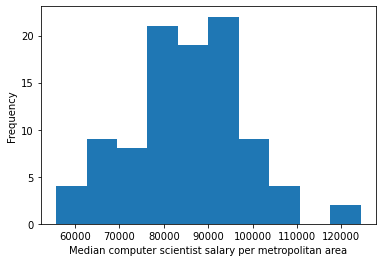

In [7]:
plt.hist(main["a_median"])
plt.xlabel("Median computer scientist salary per metropolitan area")
plt.ylabel("Frequency")
plt.show()

In [8]:
marea_sum_stats = main["a_median"].describe()
print(f"Median: {main['a_median'].median()}")
print(f"Std dev: {round(marea_sum_stats['std'], 2)}")
print(f"Min: {round(marea_sum_stats['min'], 2)}")
print(f"Max: {round(marea_sum_stats['max'], 2)}")

Median: 85595.0
Std dev: 12676.54
Min: 55720.0
Max: 124350.0


After adding the median salary, we think that the median salary by area will be better than mean area salary in future calculations, since for any given college, the median and mean differ noticeably, so the salaries by area are skewed. A median would be a better representation of the center of salaries per area. 

Comparing this histogram with that of post-undergrad salary, we see a similar trend that happened with the mean salary by area: the median and max are higher by about 10k, but the standard deviation is roughly the same (`12676.54` and `11778.17`). Since the mean and median salary both exhibit this trend compare to post-undergrad salary, we are fairly confident now that this is because of an underlying factor unrelated to skewing due to high salaries. The post-undergrad salary histogram is skewed left, while this one is more symmetric, so it is possible that graduates tend to move to lower-paying areas away from where they went to college (but to be more clear about this, we will need to match up each college with its location salary and post-undergrad salary for correlation calculations). Another possibility is that people with lower salaries are more likely to report to Payscale, because they are more interested in how they compare to others. 

#### Teacher Student Ratio 

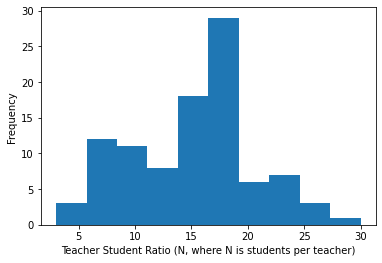

In [9]:
plt.hist(main["tsr"])
plt.xlabel("Teacher Student Ratio (N, where N is students per teacher)")
plt.ylabel("Frequency")
plt.show()

In [10]:
tsr_stats = main["tsr"].describe()
print(f"Median: {main['tsr'].median()}")
print(f"Mean: {round(tsr_stats['mean'], 2)}")
print(f"Min: {round(tsr_stats['min'], 2)}")
print(f"Max: {round(tsr_stats['max'], 2)}")

Median: 16.0
Mean: 15.02
Min: 3.0
Max: 30.0


While the range is fairly large at `27` (max of 30 - min of 3), the min/max didn't appear to skew the mean as much, as both the median and mean are fairly close, so we can see that the typical teacher student ratio is about `15` to `16`. However, the summary stats don't reveal the interesting fact that the histogram reveals: there are two peaks in the data. This is likely due to school size, as big schools likely have a higher student ratio (at peak around `17`), while the smaller schools are lower (at peak around `7`). This histogram is especially useful because it shows us that there are a large portion of schools with practically identical teacher-student ratios, so if these schools have vastly different salaries, we can more easily suggest that teacher-student ratio may not be a significant differentiator for salary. Because of the relationship between teacher student ratio and enrollment, we predict that the enrollment histogram will have two peaks also.

#### Enrollment

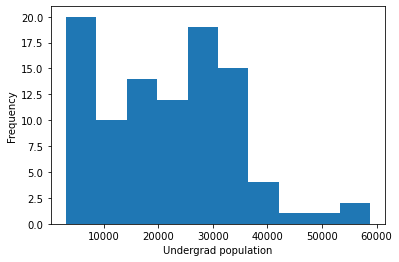

In [11]:
plt.hist(main["pop"])
plt.xlabel("Undergrad population")
plt.ylabel("Frequency")
plt.show()

In [12]:
enroll_stats = main["pop"].describe()
print(f"Median: {main['pop'].median()}")
print(f"Mean: {round(enroll_stats['mean'], 2)}")
print(f"Std dev: {round(enroll_stats['std'], 2)}")

Median: 21218.5
Mean: 21984.16
Std dev: 12212.67


We see from the standard deviation of `12212.67` that there is a decent representation of school sizes in our dataset. While the mean and median show that our typical school size is about `21000` to `22000` (as expected), there are a surprisingly large amount of schools (20) with less than `10000` students. While we originally thought that the top 600 prestigious schools would be larger, given the high number of applicants, we now are curious about whether smaller schools tend to be more prestigious. We may want to add this as a second research question in addition to our first one, since we already have prestige data to compare with.  

As predicted, there are roughly 2 peaks in the enrollment histogram, just like in the teacher-student ratio histogram. For teacher student ratio, there were ~20 schools in the 7-10 range, and we see there are about 20 schools in the <10k enrollment range. There are also ~30 schools with a teacher student ratio around 16-17, and at least 30 schools in the 30k enrollment range. This may suggest a closer relationship between teacher student ratio and undergraduate population than expected that can be revealed with further statistical analysis. Originally, we thought teacher student ratio and enrollment would be fairly distinct: teacher student ratio was intended to measure individual attention (i.e. how personalized a teacher's instruction can be -- the more personalized, the better equipped a computer science student is likely to be), while we thought of undergrad enrollment as more related to number of alumni connections and opportunities, but if it turns out that there is a signifcant correlation between these two variables, we may need to throw out one of them, as in that case either one may be used to predict/correlate with salary.

#### Average Professor Rating

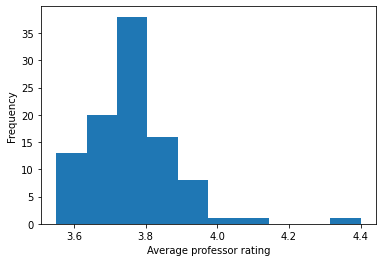

In [13]:
plt.hist(main["rat"])
plt.xlabel("Average professor rating")
plt.ylabel("Frequency")
plt.show()

In [14]:
rat_stats = main["rat"].describe()
print(f"Median: {main['rat'].median()}")
print(f"Mean: {round(rat_stats['mean'], 2)}")
print(f"Std dev: {round(rat_stats['std'], 2)}")
print(f"Max: {round(rat_stats['max'], 2)}")

Median: 3.75
Mean: 3.76
Std dev: 0.12
Max: 4.4


When we manually collected the professor rating, we noticed that most ratings seemed fairly close together. This histogram confirms our observation: the standard deviation is only `0.12`, and most ratings are between `3.6` and a little over `3.8`, with an average of `3.7`. At this point, it does seem like the closeness of the datapoints is a problem, since it may not be a great differentiator between schools and their graduate salaries if all ratings are practically the same. We cut out the outlier at 4.4, to see if we can better zoom in on the shape of data points between `3.6` to `3.8` roughly: 

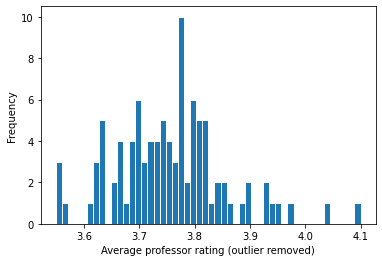

In [15]:
subset = main.copy()[main["rat"] != rat_stats["max"]]
plt.hist(subset["rat"], bins = 50, edgecolor = 'white')
plt.xlabel("Average professor rating (outlier removed)")
plt.ylabel("Frequency")
plt.show()

With this histogram, it is easier to see that there is a decent variety of ratings and also fine differences between the ratings, on the scale of hundreths. While it could be argued that the ratings are so close that the differences in hundredths between them don't matter, we think that the closeness is important. A school on `ratemyprofessors` typically has thousands of ratings, so with such a large sample size, it does matter that a school has, for example, a rating of `3.65` versus `3.68`, because moving from a rating of `3.65` to `3.68` would take hundreds of positive reviews to move up the average. So we will keep average professor rating as a factor in predicting post-undergrad salary. 

#### Additional/Miscellaneous Notes about Exploratory Data Analysis
- We didn't create a histogram for just school prestige ranking, as it would not tell us anything new. Because we set up our rankings in 'bins' of 1-4, we already know the prestige rankings are skewed, as there are more schools in the lower bins (since rank 1 is only the top 20 schools)

# Preregistration Statements
To recap, our research question is "Which combination of factors best predicts the salary of computer science undergrads, and what aspects of these factors (ex. higher vs lower factor values) maximizes the predicted salary?" In order to answer this question, along with related questions raised by the exploratory data analysis, we generated the following hypothesis and will use the following methods to further our investigation.

## Brief Overview

<b> Checking similarities between variables: </b> We noticed that student-teacher ratio and student enrollment could be interconnected, as it is possible that student enrollment could affect the ratio between students and teachers, and we want to check this quantitatively with correlation.

<b> Linear regressions (single variable): </b> We want to use single variable linear regressions with each of our factors (student ratio, prestige, student enrollment, professor ranking, and area salary) and post-graduation salary to check the relationships between any factor and our salary outcome.

<b> Linear regressions (multivariable): </b> We want to use multivariable linear regressions with combinations of our factors and post-graduation salary to create a model that would accurately analyze the relationship between multiple predictors and the salary outcome.

## Hypothesis/Analysis Preregistrations
A more in depth explanation of our specific hypotheses and what exactly we are preregistering.

1. We hypothesize that student-teacher ratio and student enrollment are closely related factors (indistinct). To test our hypothesis, we will calculate the correlation coefficient for factors student-teacher ratio and student enrollment and analyze whether the coefficient is high enough to say that the two factors are very closely related. Our threshold will be 0.7, because that roughly indicates a strong relationship. <br>
We care how closely these factors are related because in Phase II, we thought the two factors would be distinct: student-teacher ratio was supposed to be a measure of how much personalized attention a student receives, while student enrollment was a measure of how many opportunities students get (higher student population, more alumni and more clubs). However, the histograms of the two factors showed similar trends, so we want to use quantitative analysis to confirm whether the two factors are truly too highly correlated to be distinct (since student-teacher ratio is inherently connected to the size of the student population). If there is notable correlation, then we only want to use one of these factors in our regression analysis because these factors would not be measuring different concepts as we had hoped, and would both be indicative of the amount of students at the school. Using two highly correlated factors in a regression (especially multivariate) will not provide more information than if we only used one of the correlated factors, and may even impact the linear regression fit. 

2. We hypothesize that <b> only prestige </b>  will be the best predictor of post-undergrad computer science salary, and that higher prestige values/rankings will maximize the predicted salary. Our hypothesis that only prestige will matter is based on Phase II analysis: we discovered that average professor rating may be an indicator of student bias rather than teaching quality, and the salary of the area in which a college is located did not show similar trends to the histogram of post-undergrad salary. Meanwhile, based on Phase II plots, most schools had student enrollment and teacher-student ratio in the same range, meaning that enrollment/teacher-student ratio may not be a distinguishing factor between schools. Given these data limitations, we think it is likely that these factors will have little relationship with post-undergrad salary, and that only prestige may matter. We believe higher prestige rankings will maximize predicted salary based on the trend in society that students from more prestigious colleges seem to receive more pay. <br>
We will test our hypothesis by performing a single variable regression analysis between post-undergrad salaries and prestige, as well as between each of our other factors and post-undergrad salary for comparison with the fit for prestige vs post-undergrad salary. However, we will also perform a multivariate regression for each combination of factors (possibly excluding student-teacher ratio or student enrollment, as explained in the first numbered point above). This is because with single variable regressions, we cannot hold other factors constant when comparing one factor with post-undergrad salary.  With the amount of factors we have, this may cause inaccuracies with single variable regression. However, multivariate models will compute regressions on variables while keeping other variables, such as the college prestige ranking, constant, which may lead to more accurate results because we can be certain that when analyzing a variable and its relationship with post-undergrad salary, we aren’t also comparing colleges of completely different prestiges, or completely different sizes, etc. <br>
Thus, in our experiment we will also perform a multivariate regression on combinations of factors to determine which combination model has the best fit (highest R^2 score). By checking a variety of combinations, we can be more confident that we have found the best predictor(s) for salary from a group of options. 

3. We are curious about whether computer scientists tend to get jobs in the same area where they went to college, and based on differing histogram shapes from Phase II, we hypothesize that computer scientists don’t tend to find jobs where they go to college, or at least don't find jobs in areas with similar salary ranges as the area they graduated from. We will gather evidence for or against our hypothesis by matching up these factors for each school, finding the differences, and then plotting a histogram of the differences. If the histogram is skewed to the right (high differences), then it suggests that computer scientists don’t tend to stay in the same area where they went to college for jobs, whereas if the differences are small, it is possible that computer scientists do tend to either stay or go to areas with similar salary ranges as the area of their college. <br>
This section with histograms is distinct from the regression we will use on area salary vs post-undergrad salary. The regression will hopefully tell us if, for example, students graduating from high-earning areas tend to also get high-earning jobs, but it's possible that the area where they get a job is still much less in terms of pay than where they graduated from (since the Phase II histogram for post-undergrad salary seemed to be centered lower than that of the area salary). With the difference histograms, it will be easier to get a sense of the magnitude of difference between the factors.

# Data Analysis
In this section we will use numerical analysis to investigate the preregistered items from above. 

## Correlation for student ratio/enrollment

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
#subset the dataframe to only get the student ratio and population columns
strat_enr = main[["tsr", "pop"]]

corr = strat_enr.corr(method = 'pearson')
corr_val = corr.iloc[0]['pop']
print("The correlation between student ratio and enrollment is: " + str(round(corr_val,2)))

The correlation between student ratio and enrollment is: 0.72


The correlation of `0.72` surpasses our threshold of `0.7`. Thus it appears that student-teacher ratio and enrollment are essentially redundant variables. We remove student enrollment because we think student-teacher ratio, related to the degree of individualized attention, would be more important factor for aspiring college students to consider than total student population (since even in big schools, students typically form small communities). 

## Starting salary difference from area salary

In [18]:
import pandas
from matplotlib import pyplot

In [19]:
#converting early pay and median area columns to numpy arrays to calculate the difference
starting_salary = main["early_pay"].to_numpy()
area_salary = main["a_median"].to_numpy()
diff = starting_salary - area_salary

Text(0, 0.5, 'Count')

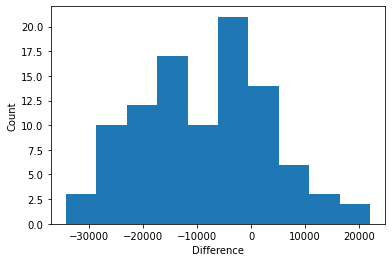

In [20]:
pyplot.hist(diff)
pyplot.xlabel('Difference') 
pyplot.ylabel('Count') 

## Linear regression on predictors for post-graduation salary
We use `itertools.combinations` to find combinations of factors and perform multiregression on the combos to find the model of best fit, to compare with our hypothesized best model of prestige vs salary.

In [21]:
from itertools import combinations, chain
from sklearn.linear_model import LinearRegression
import operator
import seaborn as sns

In [22]:
cols = list(main.columns)

# Remove columns that are not important for multiregression
cols.remove('school')
cols.remove('a_mean')
cols.remove('county')
# Early pay is our outcome, not an input
cols.remove('early_pay')

# Remove enrollment because it's too closely related to 
# teacher-student ratio 
cols.remove('pop')

# Final list of possible inputs, from which we choose combinations, for our regression
cols

['rank', 'tsr', 'a_median', 'rat']

In [23]:
# List to save regression results for each combination, such as R^2, coefficients, and the input names
rsqr_scores = [] 
# Iterate through combinations of 1-4 inputs
for num_inputs in range(1, 5): 
    combos = combinations(cols, num_inputs)
    for combo in list(combos): 
        combo = list(combo)
        
        model = LinearRegression().fit(main[combo], main['early_pay'])
        score = model.score(main[combo], main['early_pay'])
        rsqr_scores.append((score, model.coef_, combo))

In [24]:
# Find maximum R^2 score 
max_score = max(rsqr_scores, key=operator.itemgetter(0))
print(f"The max R^2 is {max_score[0]}, with inputs {max_score[2]}")
print(f"The coefficients for this model are {max_score[1]}")

The max R^2 is 0.6950926972277931, with inputs ['rank', 'tsr', 'a_median', 'rat']
The coefficients for this model are [-4.57036558e+03 -6.52613483e+02  2.15570158e-01  2.45722933e+04]


In [25]:
# R^2 for our hypothesis, prestige vs salary 
result = list(filter(lambda item: item[2] == ["rank"], rsqr_scores))
print(f"The R^2 is {result[0][0]} for prestige, namely input {result[0][2]}")
print(f"The coefficients for this model are {result[0][1]}")

The R^2 is 0.47900474071076193 for prestige, namely input ['rank']
The coefficients for this model are [-8043.28144203]


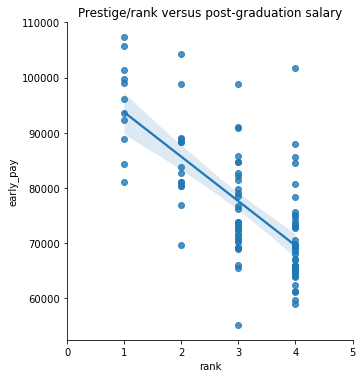

In [26]:
sns.lmplot(x = 'rank', y = 'early_pay', data = main)
plt.title("Prestige/rank versus post-graduation salary")
plt.xlim(0, 5)
plt.show()

# Questions for Reviewers

# Appendix

#### Code
For our web scraping code, please refer to the notebook containing our web scraping code in this zipped folder (called `Phase II Scraping.ipynb`). For our data cleaning code, please refer to the notebook called `Phase II Data Cleaning.ipynb` in this zipped folder.

#### Ranking List Research
Please go to this Google Doc to view all of the ranking lists and their links that we considered for ranking college prestige: https://docs.google.com/document/d/1ir6Yyylmpt4Xbgjfd34MWFPMk9_d9j2T5M2NIeY5Lvk/edit?usp=sharing

#### Source Citations
- <a href=https://www.payscale.com/college-salary-report/best-schools-by-majors/computer-science>Payscale computer science salaries by school </a>
- <a href=https://www.topuniversities.com/university-rankings/university-subject-rankings/2020/computer-science-information-systems> TopUniversities computer science school rankings </a>
- The teacher student ratio, enrollment, and school geographic locations datasets were downloaded from the National Center for Education Statistic's Integrated Postsecondary Education Data System at https://nces.ed.gov/ipeds/datacenter/InstitutionByName.aspx?goToReportId=1, but the raw CSV files are on Github (`stud_fac_ratio.csv`, `enrollment.csv`, and `geographic_characteristics.csv`) 
- <a href=https://www.ratemyprofessors.com/>Average professor ratings</a> were manually collected into the `RATINGS.csv` dataset on our Github
- The <a href=https://www.bls.gov/oes/current/oes151251.htm>Bureau of Labor Statistics occupational salary by area dataset</a> can be seen in its raw form in `occupational_salary_metropolitan.csv` in our Github, but the filtered version with only computer-science jobs can be found in `occupational_salary_filtered.csv`
- Our full final dataset can be found in `main.csv`